# Rabi Oscillations

We solve the time-dependent Schrödinger equation
$$
i \partial_t \lvert \psi(t) \rangle = (\vec B \cdot \vec \sigma) \lvert \psi(t) \rangle \quad \lvert \psi(0) \rangle = \lvert \psi_0 \rangle
$$
for the evolution of a spin-1/2 particle in a time-dependent magnetic field. The field is given by $\vec B(t) = (\gamma \cos(\omega t), 0, \frac{\omega_0}{2})$ which results in the equation
$$
i \partial_t \lvert \psi(t) \rangle = (\frac{\omega_0}{2} \sigma_z + \gamma \cos(\omega t) \sigma_x) \lvert \psi(t) \rangle \quad \lvert \psi(0) \rangle = \lvert \psi_0 \rangle
$$
where $\sigma_j$ denote the Puli matrices.


## Runge-Kutta Method

For the solution of the ODE we the classical Runge-Kutta method of order 4.

In [1]:
# loading the necessary packages
using Plots
using LaTeXStrings

# custom Runge-Kutta method
function RK4(f, t, y₀)
  K = length(t)
  h = t[2] - t[1]
  y = zeros(eltype(y₀), length(y₀), K)
  y[:, 1] = y₀
  for k = 1:K - 1
    tₖ = t[k]
    yₖ = y[:, k]
    k₁ = f(tₖ, yₖ)
    k₂ = f(tₖ + h / 2, yₖ + h * k₁ / 2)
    k₃ = f(tₖ + h / 2, yₖ + h * k₂ / 2)
    k₄ = f(tₖ + h, yₖ + h * k₃)
    y[:, k + 1] = yₖ + h / 6 * (k₁ + 2 * k₂ + 2 * k₃ + k₄)
  end
  return y
end

RK4 (generic function with 1 method)

## Problem Setup and Discretization

We solve the prpoblem numerically for the resonance frequency $\omega_0 = 6$ and $\gamma = 1$. The initial state is given by $\psi_0 = (1, 0)^T = \lvert \uparrow \rangle$. We solve the equation on the interval $[0, T]$ with $T = 4\pi$, which corresponds to 2 Rabi oszillations in the case of on-resonance excitation.

The problem is in time on a uniform grid with $K = 1000$ points.

In [2]:
# problem setup
ω₀ = 6.
γ = 1.

T = 4π
y₀ = complex([1., 0.])

H(t, Δ) = [-ω₀ / 2 γ * cos((ω₀ + Δ) * t);
            γ * cos((ω₀ + Δ) * t) ω₀ / 2]

# discretization
K = 1000
t = collect(linspace(0, T, K));

## Numerical Rabi Oscillations

We simulate the dynamics of the spin particle and plot the absolute value squared of the second component. As comparison the effective dynamics is plotted. One can see that the effective dynamics captures the behavior of the actual dynamics quite well in the sense of the actual dynamics oscillating around it with a higher frequency.

[Plots.jl] Initializing backend: pyplot



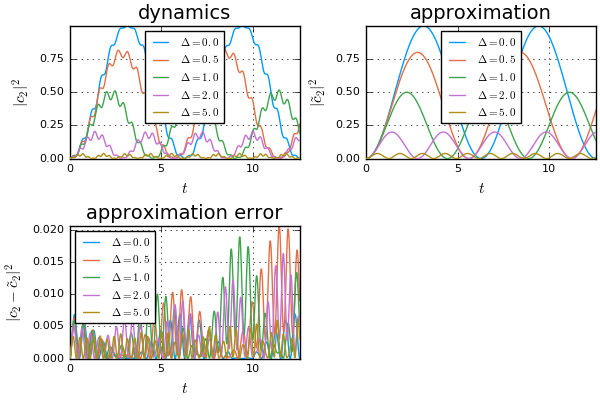

In [3]:
Y = []
Y2_approx = []
Δs = [0., 0.5, 1., 2., 5.]

for Δ in Δs
    y = RK4((t, y) -> -im * H(t, Δ) * y, t, y₀)
    push!(Y, y)
    push!(Y2_approx, im * γ / sqrt(γ^2 + Δ^2) * exp(im * (ω₀ + Δ) / 2 * t) .* sin(sqrt(γ^2 + Δ^2) / 2 * t))
end

p1 = plot(t, [abs2(y'[:, 2]) for y in Y],
labels=[latexstring("\\Delta = $Δ") for Δ in Δs]', title="dynamics", xlabel=L"t", ylabel=L"| c_2 |^2")
p2 = plot(t, map(abs2, Y2_approx),
labels=[latexstring("\\Delta = $Δ") for Δ in Δs]', title="approximation", xlabel=L"t", ylabel=L"|\tilde c_2|^2")
p3 = plot(t, map((y1, y2) -> abs2(y1'[:, 2] - y2), Y, Y2_approx),
labels=[latexstring("\\Delta = $Δ") for Δ in Δs]', title="approximation error", xlabel=L"t", ylabel=L"|c_2 - \tilde c_2|^2")
plot(p1, p2, p3)